In this example, we will study the overall breakdown of battery costs.  Following this, we will break down the costs of the materials into anode, cathode, electrolyte and other material components.

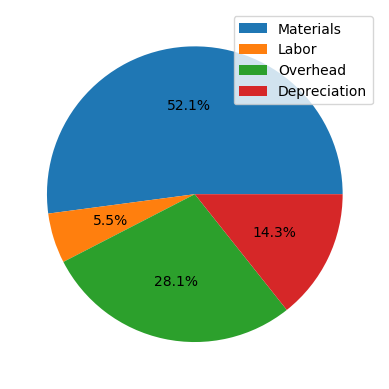

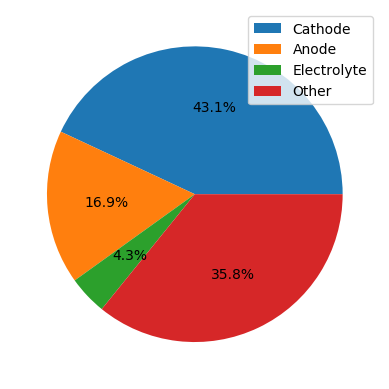

Cost/kWH: 235.97829443059203


PyObject <matplotlib.legend.Legend object at 0x00000000450B0208>

In [1]:
include("../src/PBCM.jl")
cell1 = cell()
cost1 = cost_default()
cell1_converted,cost1_converted = convert_all(cell1,cost1,mult)

cost1.general_costs.no_units_mfg = converter(80.0, mult.units_mfg)
cost_kwh,thing = cost_calc(cell1,cost1)
println("Cost/kWH: ",cost_kwh)
breakdown_gen = cost_calc(cell1,cost1,breakdown=true)

(total_unit_cost_all_materials  ,
total_direct_labor_per_unit           ,
variable_overhead_per_unit            ,
GSA_per_unit                          ,
R_and_D_per_unit                      ,
depreciation_per_unit                 ,
profits_after_taxes_per_unit          ,
warrant_cost_per_unit                 ,
cell_energy_storage) = breakdown_gen

breakdown_vec = breakdown_gen[1:end-1]
total_cost = sum(breakdown_vec)
breakdown_percentages = breakdown_vec./total_cost
breakdown_big_categories = zeros(4)
breakdown_big_categories[1] = total_unit_cost_all_materials #Materials
breakdown_big_categories[2] = total_direct_labor_per_unit #Direct Labor
breakdown_big_categories[3] = variable_overhead_per_unit+GSA_per_unit+R_and_D_per_unit+profits_after_taxes_per_unit+warrant_cost_per_unit
breakdown_big_categories[4] = depreciation_per_unit
breakdown_big_categories = breakdown_big_categories./total_cost

mat_breakdown= cost_calc(cell1,cost1,materials_breakdown = true)
cathode_cost,anode_cost,electrolyte_cost,others_cost = mat_breakdown
mat_normalized_breakdown = mat_breakdown./sum(mat_breakdown)

using PyPlot

figure(1)
clf()
pie(breakdown_big_categories,autopct="%1.1f%%")
legend(["Materials","Labor","Overhead","Depreciation"])

figure(2)
clf()
pie(mat_normalized_breakdown,autopct="%1.1f%%")
legend(["Cathode","Anode","Electrolyte","Other"])


The two figures above shows a significant portion of cell cost is contributed by materials, among which the largest share comes from cathode materials. This factor drives the manufacturers to use cathode materials with lower cobalt content and utilize the recovered battery materials from recycling processes.

The overall cost breakdown indicates that materials cost is a major contributor of cells cost, follows by overhead, then depreciation, finally, labor cost. One of the focuses of battery manufacturers' R&D is battery materials. With the development of implementation of new and better materials, the energy density, safety and life of batteries are improved. The materials cost breakdown function helps to visualize the battery materials cost, reflecting the trade-off between performance and cost.